# Regex Final Project 
---
1. Contributors:
*   Akash Kokare
*   Sailesh Nair
*   Jhanavi Behl
*   Riddhesh Khedekar
---
2. Mentors:
*   Poulami Bakshi
*   Sree Chaitanya


## Project Description: 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from tensorflow.keras import layers,models 
from tensorflow.keras.layers import *
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

## Google Colab Usage Code to load data

In [2]:
# # use for google Colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# use for google Colab
!ls /content/drive/MyDrive/Regex_CNN_Project/dataset # check the folder TRAIN and TEST show using ls / dir  

TEST  TRAIN  trained_seq_model.h5


In [4]:
# use for google Colab
!cd /content/drive/MyDrive/Regex_CNN_Project

In [5]:
data_dir = '/content/drive/MyDrive/Regex_CNN_Project/dataset/' # use for google Colab
# data_dir = './dataset/'
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 256, 256  # dimensions to which the images will be resized
batch_size = 32
num_classes = 6  #categories of trash

## Function to plot some images from the dataset

In [6]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

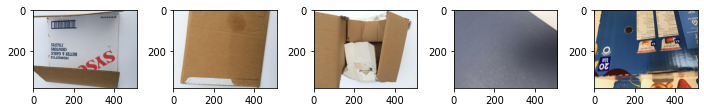

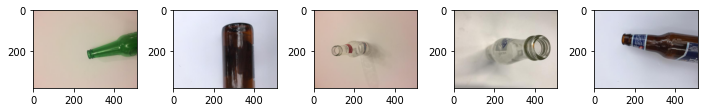

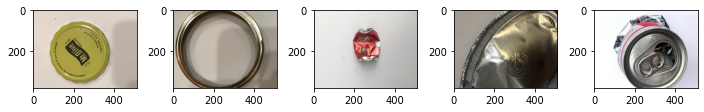

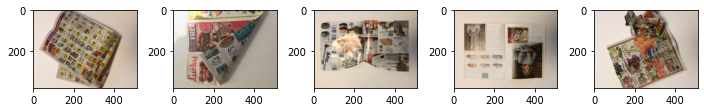

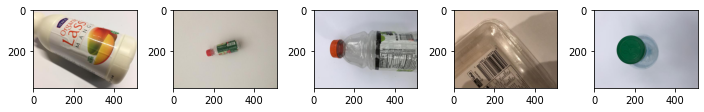

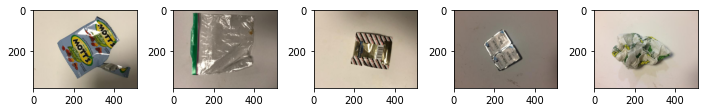

In [9]:
for k in train_data.class_indices.keys():
    plot_imgs(train_dir+'/' + k)

## Using Image Data Generator for Image Augmentation

In [7]:

train_data_gen = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2, 
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.3,
    fill_mode = 'nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_data = train_data_gen.flow_from_directory(
    train_dir, 
    target_size = (img_width, img_height), 
    batch_size = batch_size, 
    class_mode="categorical",
    subset='training')

valid_data = train_data_gen.flow_from_directory(
    train_dir, 
    target_size = (img_width, img_height), 
    batch_size = batch_size, 
    class_mode="categorical",
    subset='validation')

test_data = test_data_gen.flow_from_directory(
    test_dir, 
    target_size = (img_width, img_height), 
    batch_size = batch_size, 
    class_mode=None)


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [10]:
labels = (train_data.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
# Function to track time 
def timer(start_time=None):
    if not start_time:
        print(datetime.now())
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## Creating a CNN Model

In [14]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu', input_shape=(256,256,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Conv2D(96,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Conv2D(192,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 96)        55392     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       1

## Model Checkpoint is a function that will monitor the validation accuracy while training and whenever it sees the validation accuracy improve it saves the model

In [16]:
filepath= data_dir + "trained_seq_model.h5"
checkpoint1 = ModelCheckpoint(
    filepath,
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')
callbacks_list = [
    checkpoint1
            ]

## Compiling Model

In [17]:
opt = optimizers.Adam(learning_rate=1e-04)
model.compile(optimizer=opt, 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])

## Fitting Model

In [18]:
start_time=timer(None)
result = model.fit(
    train_data, 
    epochs = 120, 
    steps_per_epoch = 32, 
    batch_size=16, 
    validation_data = valid_data, 
    callbacks = callbacks_list)

timer(start_time)

2021-08-08 09:42:18.008059
Epoch 1/120
32/32 [==============================] - 388s 11s/step - loss: 1.7176 - accuracy: 0.2432 - val_loss: 1.7582 - val_accuracy: 0.3266

Epoch 00001: val_accuracy improved from -inf to 0.32663, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_model.h5
Epoch 2/120
32/32 [==============================] - 101s 3s/step - loss: 1.5667 - accuracy: 0.3377 - val_loss: 1.7429 - val_accuracy: 0.3065

Epoch 00002: val_accuracy did not improve from 0.32663
Epoch 3/120
32/32 [==============================] - 51s 2s/step - loss: 1.4765 - accuracy: 0.4092 - val_loss: 1.7294 - val_accuracy: 0.3492

Epoch 00003: val_accuracy improved from 0.32663 to 0.34925, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/trained_seq_model.h5
Epoch 4/120
32/32 [==============================] - 36s 1s/step - loss: 1.3988 - accuracy: 0.4648 - val_loss: 1.7132 - val_accuracy: 0.3668

Epoch 00004: val_accuracy improved from 0.34925 to 0.36683

## Visualize Performance for the CNN model created

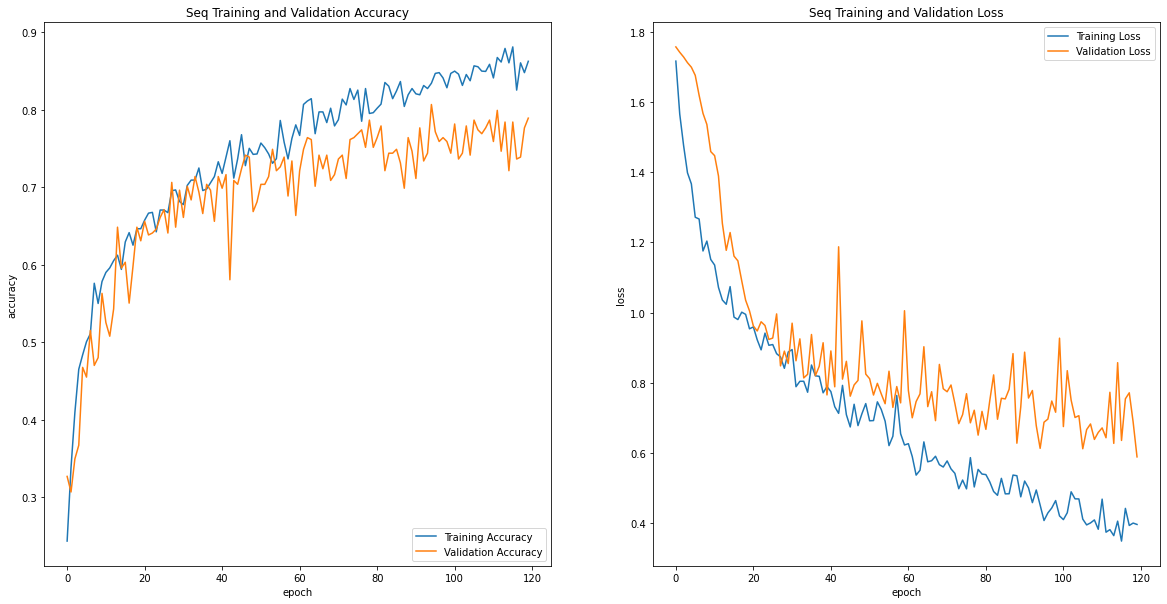

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Seq Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Seq Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## After a lot of trials we could get our sequential model to give us:   
*   Training accuracy of around 88%
*   Validation accuracy of around 80%


In [20]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Pretrained model InceptionV3 - Transfer Learning

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model1 = InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 0s 0us/step


In [22]:
for layer in model1.layers:
    layer.trainable = False

### The model is huge so lets only take a part of the model and check its accuracy with our dataset

In [28]:
last_layer = model1.get_layer('mixed6')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 14, 14, 768)


In [29]:
import tensorflow
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
prediction1 = layers.Dense(6, activation='sigmoid')(x)

model1 = tensorflow.keras.models.Model(inputs = model1.input, outputs=prediction1)

model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [30]:
filepath= data_dir + "inceptionv3_model.h5"
checkpoint1 = ModelCheckpoint(
    filepath,
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')
callbacks_list = [
    checkpoint1
            ]

## Compiling the Inception Model

In [ ]:
model1.compile(
    optimizer = RMSprop(learning_rate=1e-04),
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )

## Fitting The Model

In [31]:

start_time=timer(None)
result1 = model1.fit(
    train_data, 
    epochs = 120, 
    steps_per_epoch = 32, 
    batch_size=16, 
    validation_data = valid_data, 
    callbacks = callbacks_list)

timer(start_time)

2021-08-08 11:07:56.099910
Epoch 1/120
32/32 [==============================] - 30s 834ms/step - loss: 5.3618 - accuracy: 0.3367 - val_loss: 1.2866 - val_accuracy: 0.4749

Epoch 00001: val_accuracy improved from -inf to 0.47487, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/inceptionv3_model.h5
Epoch 2/120
32/32 [==============================] - 25s 766ms/step - loss: 1.3745 - accuracy: 0.4734 - val_loss: 1.1466 - val_accuracy: 0.5276

Epoch 00002: val_accuracy improved from 0.47487 to 0.52764, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/inceptionv3_model.h5
Epoch 3/120
32/32 [==============================] - 27s 854ms/step - loss: 1.3361 - accuracy: 0.4912 - val_loss: 1.1612 - val_accuracy: 0.5427

Epoch 00003: val_accuracy improved from 0.52764 to 0.54271, saving model to /content/drive/MyDrive/Regex_CNN_Project/dataset/inceptionv3_model.h5
Epoch 4/120
32/32 [==============================] - 26s 812ms/step - loss: 1.0961 - accuracy: 0.5762 -

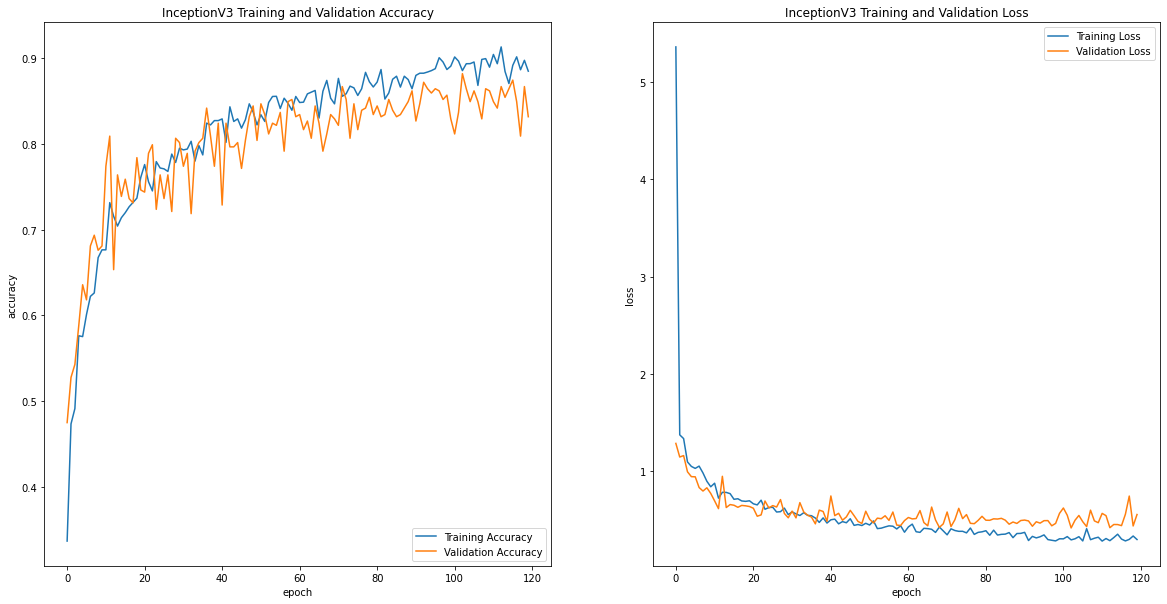

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("InceptionV3 Training and Validation Accuracy")
plt.plot(result1.history["accuracy"], label='Training Accuracy')
plt.plot(result1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result1.history["loss"], label='Training Loss')
plt.plot( result1.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('InceptionV3 Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

As we see from above, even though the CNN model gave us a good accuracy of close to 80% the pre trained model gives us a much better accuracy. 
The Cnn Model accuracy initially was only close to 70 % and to improve the acuracy we had to change: 
*   Dimensions in Layers
*   Number of Layers
*   Adding Dropout Layers
*   Experiment with Epochs, Batch Size, Steps per epoch while model fitting

Since many pretrained models are already available, we would usually use Transfer learning.
The Inception Model is giving us accuracy like:
*   Training Accuracy: 91%
*   Validation Accuracy: 88% 

We can use the model with higher accuracy for deployment.